In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd()

'C:\\Users\\Somesh\\RP_Practicals'

In [3]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [4]:
df = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [5]:
df.shape
type(df)
df.size
df.head()
df.tail()

(7032, 21)

pandas.core.frame.DataFrame

147672

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
#Check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()
#Find out types of each variables, object means string or categorical in the below output
df.info()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [7]:
#Except the below variable all are ctegorical
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#Find out number of customers who churned vs didn't
print('Counts of Labels')
df.groupby("Churn").size()

Counts of Labels


Churn
No     5163
Yes    1869
dtype: int64

In [9]:
#Convert Churn from (Yes, No) to (0, 1)
le = preprocessing.LabelEncoder()

In [10]:
le.fit(df['Churn'])

LabelEncoder()

In [11]:
list(le.classes_)

['No', 'Yes']

In [12]:
dfn = le.transform(df['Churn'])

In [13]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [14]:
df['Y'] = dfn
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
Y                   7032 non-nul

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Y'],
      dtype='object')

In [15]:
# Separate out independent categorical variables for conversion into numerical
x_catg = df.loc[:,('gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod')]
x_catg.head()
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


(7032, 15)

In [16]:
# Separate out independent numerical variables
x_num = df.loc[:,('SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges',)]
x_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [17]:
#Convert cateforical vars to dummy coding
x_num1 = pd.get_dummies(x_catg)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:
#Get all xc together
x = pd.concat([x_num1,x_num],axis=1)
x.head()
x.columns

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,2,70.70,151.65


Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_

In [19]:
#Create Dependent Variable
y = df['Y']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Y, dtype: int32

In [20]:
#Now start building the models using this converted data

In [21]:
#Lets try a decision tree

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(5274, 45)

(1758, 45)

(5274,)

(1758,)

pandas.core.frame.DataFrame

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini",max_depth=2)
dt.fit(X_train,y_train)
classes = dt.predict(X_test)
auc = metrics.roc_auc_score(y_test, classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.7263713825081277

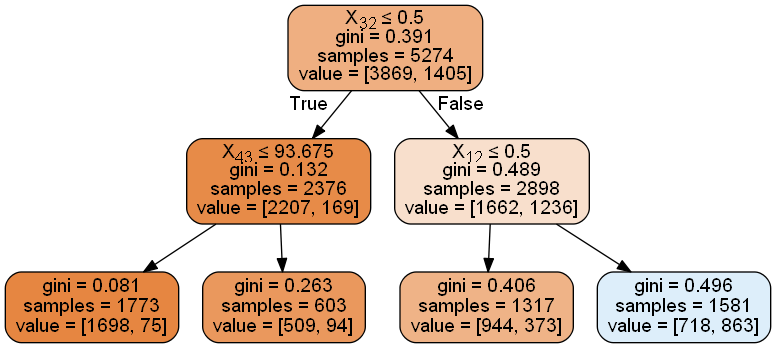

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
#Plot the tree
from sklearn import tree
import pydotplus as pydot
with open("treepic.txt","w") as x:
    x = tree.export_graphviz(dt, out_file=x)
#Please put the code in the URL 

In [26]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,classes))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,classes))
print('AUC')
print(metrics.roc_auc_score(y_test,classes))

Accuracy Score
0.7650739476678043
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1294
           1       0.55      0.64      0.59       464

   micro avg       0.77      0.77      0.77      1758
   macro avg       0.71      0.73      0.71      1758
weighted avg       0.78      0.77      0.77      1758

AUC
0.7263713825081277


Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

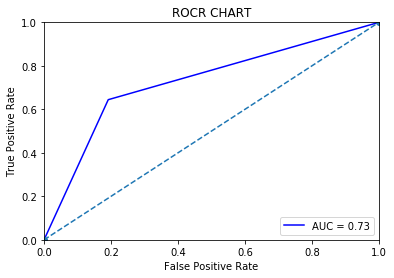

In [27]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


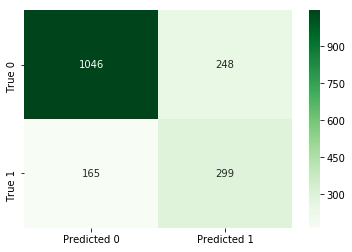

In [28]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()